In [2]:
# We will import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can already see that there are some missing values present in the dataset in the columns Age, Cabin, Embarked

# EDA

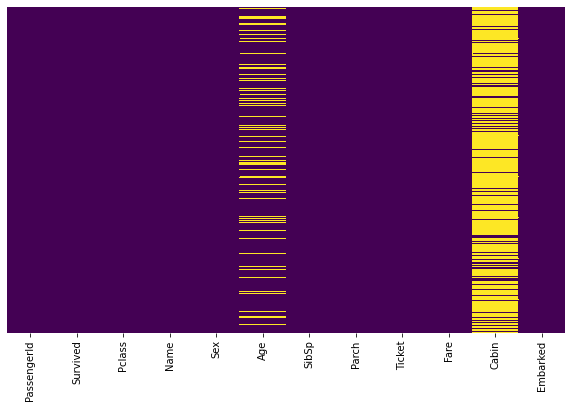

In [18]:
# Now, we plot a heatmap to see which all columns have missing vlaues present in them
plt.figure(figsize=(10,6))
sns.heatmap(train.isna(), yticklabels= False, cbar= False, cmap= 'viridis')
# we can see that age column and other Cabin column has many missing values present in them

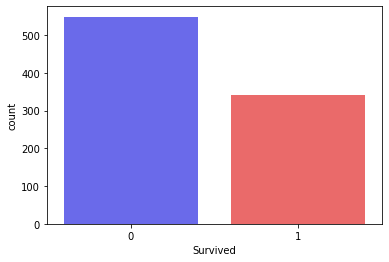

In [23]:
# Number of people survived and number of people not survived in crash
sns.countplot(x='Survived', data = train, palette= 'seismic')

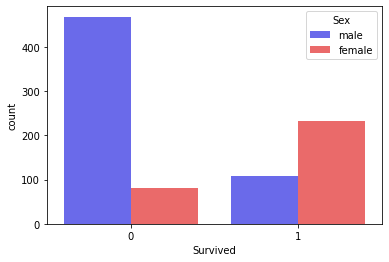

In [25]:
# Now we will see same plot for sex/ gender as hue
sns.countplot(x='Survived', data = train, palette= 'seismic', hue='Sex')

* From this we can see that many male people couldn't survive and almost more than half of the people who were survived in the crash were females
* From this we can also conclude that there were many males than females

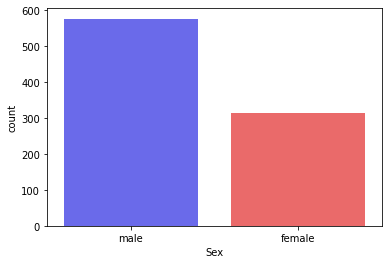

In [38]:
# Number of male and female in the Titanic 
sns.countplot(x='Sex', data= train, palette='seismic')

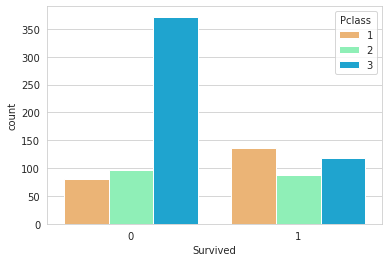

In [51]:
# We will see how many of them survived based on Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= train, hue= 'Pclass', palette= 'rainbow_r')

* We see that many people of Class 3 couldn't survive as compared to Class 1 and Class 2
* And we can also see that many Class 1 people were able to survive as compared to Class 2 and Class 3
* From this, we can also make note that there were many class 3 people in the cruise

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


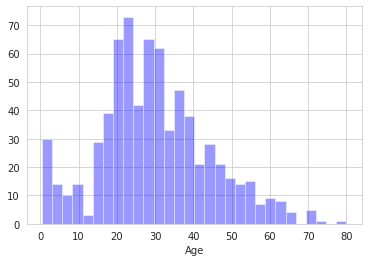

In [56]:
# Now we shall look into the distribution of Age feature in the dataset
sns.distplot(train['Age'], kde= False, bins=30, color = 'blue')

* we can see that there are many younger people who cruised the ship and there is some skewness towards the children also

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


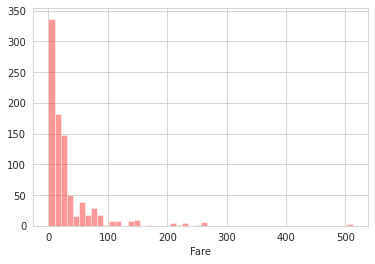

In [60]:
# Distribution of fare
sns.distplot(train['Fare'], kde= False, color= 'red')
# We see that the average pricing of the fare is around 10 to 100

# Handling Missing Values

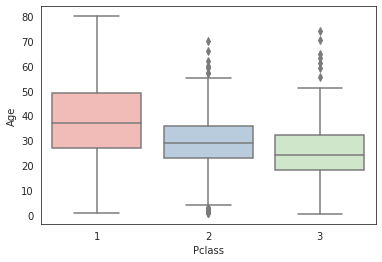

In [73]:
sns.set_style('white')
sns.boxplot(x='Pclass', y='Age', data=train, palette='Pastel1')

* we can see that wealtheir people of class 1 and 2 are tned to be more older than Class 3 people present in the ship

In [74]:
def impute_age(cols):
  Age= cols[0]
  Pclass = cols[1]
  if pd.isna(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [75]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis= 1)

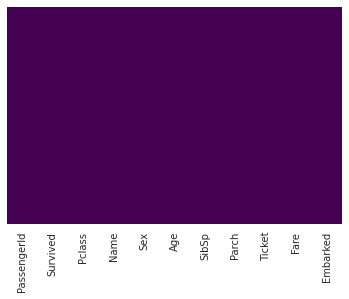

In [81]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')
# we see that all our age column is now filled and doesn't have any missing values

In [77]:
# Now we drop Cabin column since it has more missing values present than the actual data in that column
train.drop('Cabin', axis=1, inplace= True)

In [79]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
train.dropna(inplace= True)

# Creating dummy variable of categorical variables

In [84]:
sex= pd.get_dummies(train['Sex'], drop_first=True)
sex[:5]

,male
0,1
1,0
2,0
3,0
4,1


In [85]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark[:5]

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [87]:
train = pd.concat([train, sex, embark], axis=1)
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1


In [88]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)
train[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now the datset has been completely cleaned and ready for training into a model

In [90]:
X = train.drop('Survived', axis =1)
X[:5]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [91]:
y= train['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 101)

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predict = model.predict(X_test)
predict[:5]

array([0, 0, 1, 1, 0])

In [96]:
y_test[:5]

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[149  14]
 [ 39  65]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

6.85605372020333


In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)

In [101]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
pred = rfc.predict(X_test)

In [103]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[147  16]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       163
           1       0.83      0.73      0.78       104

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267

